<a href="https://colab.research.google.com/github/PraveenRaoVP/fire-detection-cnn/blob/main/fire_detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow numpy matplotlib

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="juTthYbcvVG3S3mKbzaN")
project = rf.workspace("firedetectiondataset-uekht").project("fire-detection-e4puo")
dataset = project.version(1).download("yolov7")

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input

In [ ]:
base_dir = "../content/fire-detection-1"

In [ ]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [ ]:
train="../content/fire-detection-1/train"

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000)

Found 2429 files belonging to 2 classes.
Using 1944 files for training.


In [ ]:
val="../content/fire-detection-1/valid"

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 692 files belonging to 2 classes.
Using 138 files for validation.


In [ ]:
test="../content/fire-detection-1/test"

test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 345 files belonging to 2 classes.


In [ ]:
class_names = ['fire']

In [ ]:
train_data.class_names = class_names
val_data.class_names = class_names

In [ ]:
print(train_data)
print(val_data)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Epoch 1/20
61/61 [==============================] - 107s 2s/step - loss: 9.6209 - accuracy: 0.0787 - val_loss: 3.2786 - val_accuracy: 1.0000
Epoch 2/20
61/61 [==============================] - 103s 2s/step - loss: 8.7057 - accuracy: 0.1610 - val_loss: 2.9895 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 104s 2s/step - loss: 8.2271 - accuracy: 0.2274 - val_loss: 2.8705 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 103s 2s/step - loss: 8.6953 - accuracy: 0.1626 - val_loss: 2.7703 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 103s 2s/step - loss: 8.1460 - accuracy: 0.1517 - val_loss: 2.7095 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 104s 2s/step - loss: 8.7667 - accuracy: 0.1528 - val_loss: 2.7050 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 104s 2s/step - loss: 8.2719 - accuracy: 0.1965 - val_loss: 2.5902 - val_accuracy: 1.0000
Epoch 8/20
61

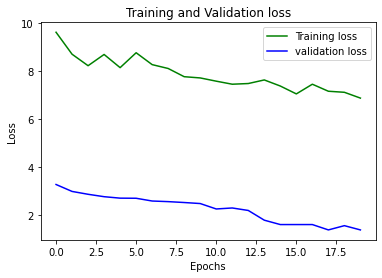

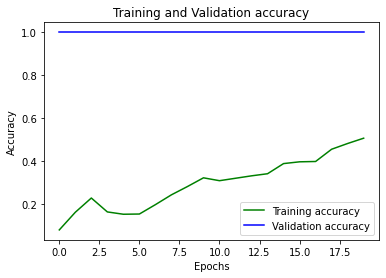

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_data, validation_data=val_data, epochs=20)
model.evaluate(test_data)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_loss.png")
plt.show()
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("train_vs_val_acc.png")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class_names={0:"fire"}

1/1 [==============================] - 0s 45ms/step


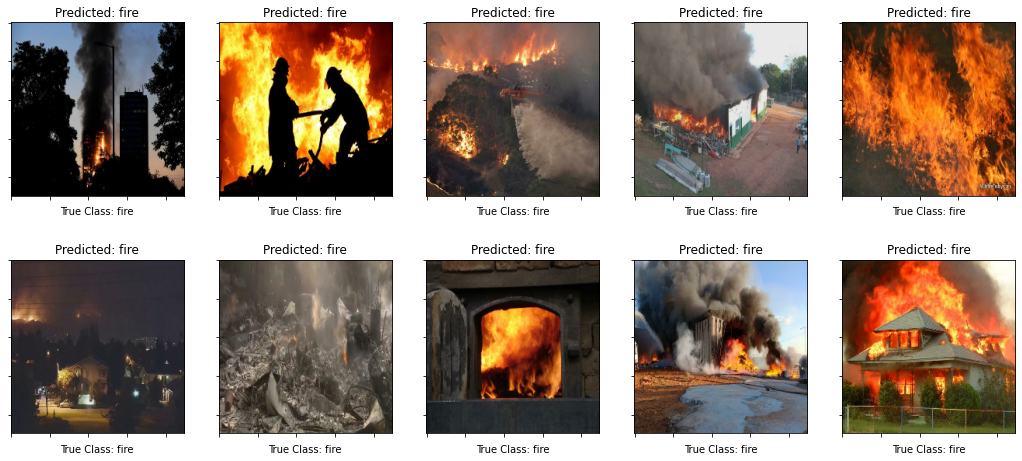

In [ ]:
plt.figure(figsize=(18,8))
for images, labels in val_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))    
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(val_data.class_names[labels[i]]))